# Quiz 2 - CNN
Wyatt Blair

DUE: 5/5/2024

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

import sys
sys.path.append('../')

from data import get_data
from util import plot_data, evaluate_model

In [2]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [3]:
data = get_data()

___
## Convolutional Neural Network (CNN)

$G[m, n] = (f*h)[m,n] = \sum_j{\sum_{k}{h[j,k]f[m-j, n-k]}}$

$f :=$ input image

$h :=$ kernel

$m, n :=$ matrix indices

$G :=$ resulting feature map


In [4]:
class CNN(nn.Module):
    def __init__(self, input_channels, output_features):
        super(CNN, self).__init__()

        # First convolution layer
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()

        # Second convolution layer
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

        # Third convolution layer
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()

        # Global average pooling layer
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)

        # Fully connected layer
        self.fc = nn.Linear(64, output_features)

    def forward(self, x):

        x = x.view(1, 1, -1)

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1) 
        x = self.fc(x)
        return x



Training CNN:   0%|          | 0/100 [00:00<?, ?it/s]

R2-Scores: 
--> TRAIN: 0.72591
--> TEST : -0.77136
--> FULL : 0.66451
MSE-Scores: 
--> TRAIN: 0.01059
--> TEST : 0.02990
--> FULL : 0.01444


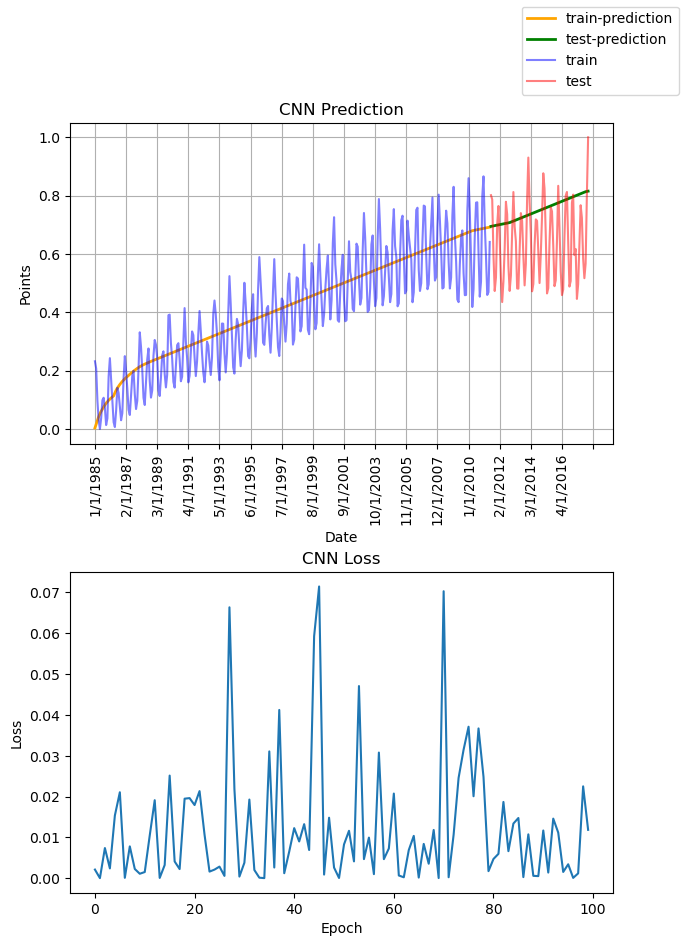

In [5]:
# instantiate model
model_kwargs = {
    'input_channels': 1,
    'output_features': 1,
}
model = CNN(**model_kwargs)

# run train/evaluation
evaluation_kwargs = {
    'model': model,
    'num_epochs': 100,
    'lr': 0.001,
}
evaluate_model(**evaluation_kwargs)